1. Linear Regression

a) Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing functions from scikit-learn. The provided data is already normalized (see description), so there is no need for additional normalization. Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data set. Separate the target attribute for regression.

In [22]:
#cd OneDrive/Ross/CSC478/hw3/

In [23]:
import numpy as np
import pandas as pd
import pylab as pl
%matplotlib inline

#cd OneDrive/Ross/CSC478/hw3/

# load the data
comm = pd.read_csv("communities.csv", index_col=0,na_values='?')
# describe the attributes
print comm.describe(include='all').T
# define the target attribute
targets = comm['ViolentCrimesPerPop']
# remove the target and non predictive data elements from the set
comm = comm.drop('ViolentCrimesPerPop', 1) # 0 for rows and 1 for columns
comm = comm.drop('communityname', 1) # 0 for rows and 1 for columns

# find columns with missing values and replace with the mean for the column
for header in list(comm.columns.values):
    if comm[comm[header].isnull()].size > 0:
        var_mean = comm[header].mean()
        comm[header].fillna(var_mean, axis=0, inplace=True)

                      count unique               top freq       mean  \
communityname          1994   1828  Jacksonvillecity    5        NaN   
population             1994    NaN               NaN  NaN  0.0575928   
householdsize          1994    NaN               NaN  NaN   0.463395   
racepctblack           1994    NaN               NaN  NaN   0.179629   
racePctWhite           1994    NaN               NaN  NaN   0.753716   
racePctAsian           1994    NaN               NaN  NaN   0.153681   
racePctHisp            1994    NaN               NaN  NaN   0.144022   
agePct12t21            1994    NaN               NaN  NaN   0.424218   
agePct12t29            1994    NaN               NaN  NaN   0.493867   
agePct16t24            1994    NaN               NaN  NaN   0.336264   
agePct65up             1994    NaN               NaN  NaN   0.423164   
numbUrban              1994    NaN               NaN  NaN  0.0640722   
pctUrban               1994    NaN               NaN  NaN   0.69

b) Perform standard linear regression on data using the implementation for Ch. 8 of MLA. Compute the RMSE value on the full training data. Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights). Finally, perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE (for cross validation, you may use the KFold module from sklearn.cross_validation)

In [24]:
# convert the data and targets to Numpy arrays
comm = comm.as_matrix()
targets = targets.as_matrix()

# add a column of ones to the data
x = np.array([np.concatenate((v,[1])) for v in comm])
y = targets

In [25]:
# define the function
def standRegres(xArr,yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print "This matrix is singular, cannot do inverse"
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [26]:
# Compute RMSE on training data
# find the weights
ws = standRegres(x,y)
# get the predictions
p = x*ws
# turn the resulting matrix into a NumPy array
p = np.squeeze(np.asarray(p))
# Now we can constuct a vector of errors
err = abs(p-y)


# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)
## Compute RMSE
rmse_train = np.sqrt(total_error/len(p))
print rmse_train

0.128889607798


plot the correlation between the predicted and actual values of the target attribute
pl.plot(p, y,'ro')
pl.plot([0,1],[0,1], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

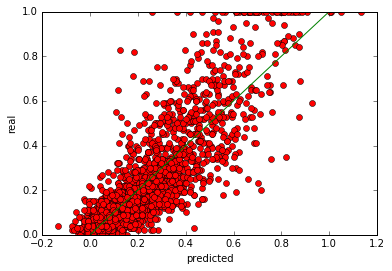

In [27]:
#plot the correlation between the predicted and actual values of the target attribute 
pl.plot(p, y,'ro') 
pl.plot([0,1],[0,1], 'g-') 
pl.xlabel('predicted') 
pl.ylabel('real') 
pl.show()

In [28]:
# display the obtained regression coefficients (weights)
print 'Regression Coefficients: \n', ws

Regression Coefficients: 
[[  1.31108068e-01]
 [ -3.14114977e-02]
 [  2.09909670e-01]
 [ -4.05351612e-02]
 [ -1.38892919e-02]
 [  5.89726825e-02]
 [  1.23399025e-01]
 [ -2.22621600e-01]
 [ -1.47500199e-01]
 [  5.01635477e-02]
 [ -2.42413829e-01]
 [  4.64024392e-02]
 [ -1.96945615e-01]
 [ -2.06117500e-01]
 [  4.65935490e-02]
 [ -1.77212915e-01]
 [  6.30148504e-02]
 [  1.14942190e-02]
 [ -9.08951848e-02]
 [  2.74640044e-01]
 [  1.01752476e-01]
 [ -3.31517562e-01]
 [ -2.91799268e-02]
 [ -3.54483393e-02]
 [  2.26173855e-02]
 [  4.30950137e-02]
 [  3.44408548e-02]
 [  1.28412458e-01]
 [ -1.91293360e-01]
 [ -1.00769002e-01]
 [  6.46856092e-02]
 [  1.06062117e-01]
 [  2.44126005e-06]
 [  2.34984611e-01]
 [ -3.75705330e-02]
 [ -7.74957660e-03]
 [  4.66779619e-01]
 [  2.26295907e-01]
 [  1.74621953e-01]
 [ -5.75206227e-01]
 [ -1.41954207e-01]
 [  5.68782538e-02]
 [ -3.51066745e-01]
 [ -3.49493414e-02]
 [  4.63705978e-04]
 [  5.57016681e-02]
 [ -1.82238360e-01]
 [ -1.54646442e-01]
 [  1.26172899

In [29]:
# perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE 
# (for cross validation, you may use the KFold module from sklearn.cross_validation)
from sklearn.cross_validation import KFold

kf = KFold(len(x), n_folds=10)
xval_err = 0
for train,test in kf:
    ws = standRegres(x[train],y[train])
    p = x[test]*ws
    p = np.squeeze(np.asarray(p))
    e = p-y[test]
    xval_err += np.dot(e,e)
    
rmse_10cv = np.sqrt(xval_err/len(x))

print 'RMSE 10-fold cross validation: ', rmse_10cv
print 'Training RMSE: ', rmse_train

RMSE 10-fold cross validation:  0.136333079233
Training RMSE:  0.128889607798


c) Feature Selection:  use the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression. For feature selection, write a script or function that takes as input the training data, target attribute; the model; and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (you can use k=5). You can use feature_selection.SelectPercentile to find the most informative variables. Show the list of most informative variables and their weights [Note: since this is regression not classification, you should use feature_selection.f_regression as scoring function rather than chi2). Next, plot the model's mean absolute error values  on cross-validation relative to the percentage of selected features (See scikit-learn's metrics.mean_absolute_error). In order to use cross_validation.cross_val_score with regression you'll need to pass to it scoring='mean_absolute_error' as a parameter. [Hint: for an example of a similar feature selection process please review the class example notebook. Also, review scikit-learn documentation for feature selection.]

In [30]:
# write a script or function that takes as input the training data, target attribute; the model; 
# and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use.

# load the data
comm = pd.read_csv("communities.csv", index_col=0,na_values='?')
# define the target attribute
targets = comm['ViolentCrimesPerPop']
# remove the target and non predictive data elements from the set
comm = comm.drop('ViolentCrimesPerPop', 1) # 0 for rows and 1 for columns
comm = comm.drop('communityname', 1) # 0 for rows and 1 for columns

# find columns with missing values and replace with the mean for the column
for header in list(comm.columns.values):
    if comm[comm[header].isnull()].size > 0:
        var_mean = comm[header].mean()
        comm[header].fillna(var_mean, axis=0, inplace=True)

        
# convert the data and targets to Numpy arrays
comm_matrix = comm.as_matrix()
targets_matrix = targets.as_matrix()

# add a column of ones to the data
x = np.array([np.concatenate((v,[1])) for v in comm_matrix])
y = targets_matrix      

In [31]:
from sklearn import cross_validation
import math
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn import feature_selection

def ftr_sel(x,y,model):
    
    model.fit(x,y)
    percentiles = range(1, 100, 5)
    results = []
    for i in range(1, 100, 5):
        fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
        X_train_fs = fs.fit_transform(x, y)
        scores = cross_validation.cross_val_score(model, X_train_fs, y, cv=5, scoring='mean_absolute_error')
        results = np.append(results, scores.mean())

    optimal_percentil = np.where(results == results.max())[0]
    op_perc = percentiles[optimal_percentil]
    #optimal_num_features = int(math.floor(percentiles[optimal_percentil]*len(x.columns)/100))
    
    return op_perc
    

In [32]:
# show the list of most informative variables and their weights
# get the optimal percentile from our function
op_perc = ftr_sel(comm,targets,LinearRegression()) # do I need to add a column of ones prior to passing the data?

headers = list(comm.columns.values)
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=op_perc)
x_train_fs = fs.fit_transform(x, y)

print 'Most informative variables and their weights:\n'
for i in range(0,len(headers)):
    if fs.get_support()[i]==True:
        print headers[i] + ': ' + str(fs.scores_[i])

Most informative variables and their weights:

population: 310.369918779
racepctblack: 1319.68643314
racePctWhite: 1758.77227347
numbUrban: 302.12358082
medIncome: 437.1590743
pctWInvInc: 990.700974651
pctWPubAsst: 982.200467892
medFamInc: 475.837601763
perCapInc: 281.878264885
NumUnderPov: 499.025448645
PctPopUnderPov: 745.599159432
PctLess9thGrade: 405.110531951
PctNotHSGrad: 607.30932519
PctUnemployed: 679.145660493
MalePctDivorce: 759.581937457
FemalePctDiv: 891.494024673
TotalPctDiv: 876.510085951
PctFam2Par: 1987.05731023
PctKids2Par: 2388.61868809
PctYoungKids2Par: 1588.37986036
PctTeen2Par: 1550.53163637
NumIlleg: 567.975360335
PctIlleg: 2381.98320035
PctLargHouseFam: 343.442480513
PctPersOwnOccup: 759.916937383
PctPersDenseHous: 514.036224481
PctHousLess3BR: 578.789197875
MedNumBR: 291.680471184
HousVacant: 430.103642138
PctHousOwnOcc: 566.905240411
PctVacantBoarded: 605.507916549
PctHousNoPhone: 623.483263567
PctWOFullPlumb: 305.118590384
NumInShelters: 327.491789621
NumStree

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:18: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


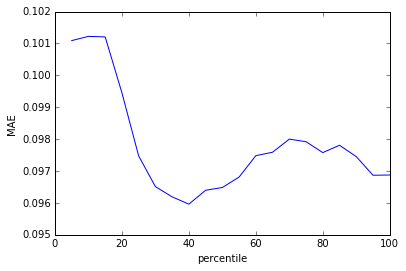

In [33]:
from sklearn import cross_validation

# plot the model's mean absolute error values on cross-validation relative to the percentage of selected features
linreg = LinearRegression()
x_values = [] # empty list to collect x values
y_values = [] # empty list to collect y values


for i in range(5, 101, 5):
    x_values.append(i)
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    X_train_fs = fs.fit_transform(comm, targets)
    linreg.fit(X_train_fs,targets)
    errors = cross_validation.cross_val_score(linreg, X_train_fs, targets, cv=5, scoring='mean_absolute_error')
    y_values.append(errors.mean()*-1)

pl.plot(x_values,y_values)
pl.xlabel('percentile') 
pl.ylabel('MAE') 
pl.show()

d) Next, perform Ridge Regression and Lasso Regression, however this time use the modules from sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha parameter. First, create a 20%-80% randomized split of the data. Set aside the test portion; the model selection process should be performed using the 80% training data partition. You should create a function that takes as input the data and target attribute; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter. The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). You should also plot the error values on the training and cross-validation splits across the specified values of the alpha parameter. Finally, using the best alpha value, run the model on the set-aside test data. Discuss your observation and conclusions. [Hint: for an example of a similar model selection process please review the class example notebook.]

In [34]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.cross_validation import KFold
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
# load the data
comm = pd.read_csv("communities.csv", index_col=0,na_values='?')
# define the target attribute
targets = comm['ViolentCrimesPerPop']
# remove the target and non predictive data elements from the set
comm = comm.drop('ViolentCrimesPerPop', 1) # 0 for rows and 1 for columns
comm = comm.drop('communityname', 1) # 0 for rows and 1 for columns

# find columns with missing values and replace with the mean for the column
for header in list(comm.columns.values):
    if comm[comm[header].isnull()].size > 0:
        var_mean = comm[header].mean()
        comm[header].fillna(var_mean, axis=0, inplace=True)

        
# convert the data and targets to Numpy arrays
comm_matrix = comm.as_matrix()
targets_matrix = targets.as_matrix()

# add a column of ones to the data
x = np.array([np.concatenate((v,[1])) for v in comm_matrix])
y = targets_matrix  


In [36]:
# create a 20%-80% randomized split of the data
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

In [37]:
# create a function that takes as input the data and target attribute; the parameter to vary and a list of its values; 
# the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter

def calc_params(x, y, model, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    x = np.array(x)
    y = np.array(y)

    # initialize training and testing scores with zeros
    train_errors = np.zeros(len(param_values))
    test_errors = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        # set classifier parameters
        model.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_errors = np.zeros(K)
        k_test_errors = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(len(x), K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        for j, (train, test) in enumerate(cv):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            model.fit([x[k] for k in train], y[train])
            
            k_train_error = cross_validation.cross_val_score(model, x[train], y[train], cv=K, scoring='mean_absolute_error')
            k_test_error = cross_validation.cross_val_score(model, x[test], y[test], cv=K, scoring='mean_absolute_error')
            
            k_train_errors[j] = k_train_error.mean()*-1
            k_test_errors[j] = k_test_error.mean()*-1
            
            #k_train_scores[j] = model.score([x[k] for k in train], y[train])
            #k_test_scores[j] = model.score([x[k] for k in test], y[test])
            
        # store the mean of the K fold scores
        train_errors[i] = np.mean(k_train_errors)
        test_errors[i] = np.mean(k_test_errors)
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_errors, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_errors, label='Test', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.title(str(model).split('(')[0])
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation error")

    # return the training and testing scores on each parameter value
    min_error = np.where(test_errors == test_errors.min())[0][0]
    op_lambda = lambdas[min_error]
    return op_lambda

In [38]:
# using the best alpha value, run the model on the set-aside test data
ridge = Ridge(fit_intercept=True)
lasso = Lasso(fit_intercept=True)

# initialize lambda values to be passed into the function
lambdas = np.linspace(0.0001, 20, 100)
lambdas = np.array([int(e) for e in lambdas])

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:30: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator


RMSE on Test data using Lasso Regression: 0.143450355088


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator


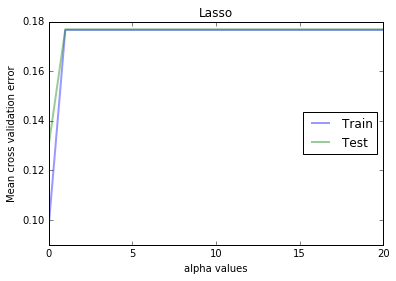

In [39]:
# pass the values into the function
lambda_lasso = calc_params(x_train, y_train, lasso, lambdas, 'alpha', 5)

lasso_model = Lasso(fit_intercept=True, alpha=lambda_lasso)
lasso_model.fit(x_train,y_train)
p = lasso_model.predict(x_test)
e = p-y_test
total_error = np.dot(e,e)
rmse_test = np.sqrt(total_error/len(p))

print 'RMSE on Test data using Lasso Regression:', rmse_test

RMSE on Test data using Ridge Regression: 0.145265629387


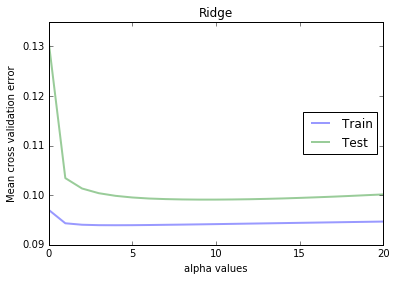

In [40]:
# pass the values into the function
lambda_ridge = calc_params(x_train, y_train, ridge, lambdas, 'alpha', 5)

ridge_model = Ridge(fit_intercept=True, alpha=lambda_ridge)
ridge_model.fit(x_train,y_train)
p = ridge_model.predict(x_test)
e = p-y_test
total_error = np.dot(e,e)
rmse_test = np.sqrt(total_error/len(p))

print 'RMSE on Test data using Ridge Regression:', rmse_test

<b /b>
As expected for the Ridge Regression model, we find that there is a turning point in the error on the test sample set as we increase the lambda value passed as the ridge regression parameter right at lambda = 9.  Using this optimal lambda value, we find that the RMSE on the test data using Lasso regression is .145.

Updating the lambda value for Lasso regression appears a bit more oddly due to the calculation of the cost for Lasso regression.  Here we see that smaller lambda values are more optimal and and RMSE on the test data comes to .2399 with an optimal lambda value 

e) Next, perform regression using Stochastic Gradient Descent for regression. For this part, you should use the SGDRegessor module from sklearn.linear_model. Again, start with creating randomized 80%-20% train-test split. SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing. For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search) Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values). Using the best parameters, apply the model to the set-aside test data. Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model to the set-aside test data. Provide a summary of your findings from the above experiments.

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

# create a 20%-80% randomized split of the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

# SGD is very senstitive to varying-sized feature values. So, first we need to do feature scaling.
    # training
scaler = StandardScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
    # test
scaler = StandardScaler()
scaler.fit(x_test)
x_test_s = scaler.transform(x_test)




In [42]:
from sklearn.grid_search import GridSearchCV

#sgdreg = SGDRegressor(penalty='l2', alpha=0.15, n_iter=200)

sgdreg = SGDRegressor()
    
parameters = {
    'penalty': ['l1','l2'],
    'alpha': np.linspace(0.0001, 10, 20)
}

gs = GridSearchCV(sgdreg, parameters, verbose=1, cv=5)
gs.fit(x_train_s, y_train)
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.4s finished


({'alpha': 0.0001, 'penalty': 'l2'}, 0.65333435377582538)

In [43]:
# apply the parameters to the set aside test data
sgdreg = SGDRegressor(penalty='l2', alpha=1.0527210526315789, n_iter=200)

# Compute RMSE on test data
sgdreg.fit(x_train_s,y_train)
p = sgdreg.predict(x_test_s)
err = p-y_test
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

print 'RMSE on the test data with optimal parameters is: ', rmse_train

RMSE on the test data with optimal parameters is:  0.150587071169


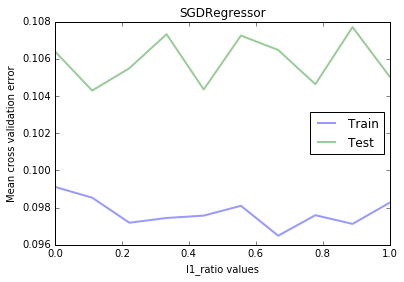

In [44]:
# perform model selection (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  
# the "elasticnet" penalty parameter
sgdreg = SGDRegressor(penalty='elasticnet')

l1_ratio = np.linspace(0, 1, 10)

op_l1_ratio = calc_params(x_train_s, y_train, sgdreg, l1_ratio, 'l1_ratio', 5)


In [45]:
# using the best mixing ratio, apply the Elastic Net model to the set-aside test data
sgdreg = SGDRegressor(penalty='elasticnet',l1_ratio=op_l1_ratio)

# Compute RMSE on training data
sgdreg.fit(x_train_s,y_train)
p = sgdreg.predict(x_test_s)
err = p-y_test
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))
print 'RMSE using SGD with optimal l1_ratio is: ', rmse_train

RMSE using SGD with optimal l1_ratio is:  0.146027969776
